# Preprocessing and pipelines

### Creating dummy variables

In [91]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np

In [14]:
gap = pd.read_csv('gapminder.csv')
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [15]:
print(gap.shape)
print(gap.info())

(139, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB
None


In [16]:
gap['Region'].value_counts()

Europe & Central Asia         41
Sub-Saharan Africa            40
America                       27
East Asia & Pacific           14
Middle East & North Africa    10
South Asia                     7
Name: Region, dtype: int64

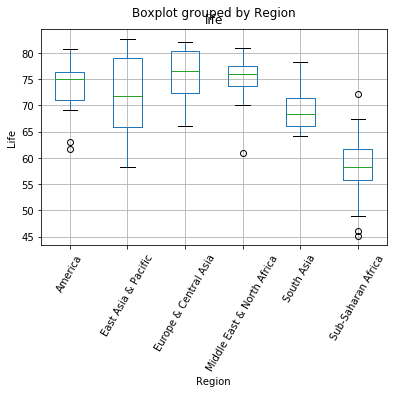

In [17]:
gap.boxplot('life', 'Region', rot=60)
plt.xlabel('Region')
plt.ylabel('Life')
plt.show()

In [18]:
gap_region = pd.get_dummies(gap)
gap_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 15 columns):
population                           139 non-null float64
fertility                            139 non-null float64
HIV                                  139 non-null float64
CO2                                  139 non-null float64
BMI_male                             139 non-null float64
GDP                                  139 non-null float64
BMI_female                           139 non-null float64
life                                 139 non-null float64
child_mortality                      139 non-null float64
Region_America                       139 non-null uint8
Region_East Asia & Pacific           139 non-null uint8
Region_Europe & Central Asia         139 non-null uint8
Region_Middle East & North Africa    139 non-null uint8
Region_South Asia                    139 non-null uint8
Region_Sub-Saharan Africa            139 non-null uint8
dtypes: float64(9), uint8(6)
memory u

In [19]:
gap_region = gap_region.drop('Region_Sub-Saharan Africa', axis=1)
gap_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 14 columns):
population                           139 non-null float64
fertility                            139 non-null float64
HIV                                  139 non-null float64
CO2                                  139 non-null float64
BMI_male                             139 non-null float64
GDP                                  139 non-null float64
BMI_female                           139 non-null float64
life                                 139 non-null float64
child_mortality                      139 non-null float64
Region_America                       139 non-null uint8
Region_East Asia & Pacific           139 non-null uint8
Region_Europe & Central Asia         139 non-null uint8
Region_Middle East & North Africa    139 non-null uint8
Region_South Asia                    139 non-null uint8
dtypes: float64(9), uint8(5)
memory usage: 10.5 KB


In [20]:
gap_region = pd.get_dummies(gap, drop_first=True)
gap_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 14 columns):
population                           139 non-null float64
fertility                            139 non-null float64
HIV                                  139 non-null float64
CO2                                  139 non-null float64
BMI_male                             139 non-null float64
GDP                                  139 non-null float64
BMI_female                           139 non-null float64
life                                 139 non-null float64
child_mortality                      139 non-null float64
Region_East Asia & Pacific           139 non-null uint8
Region_Europe & Central Asia         139 non-null uint8
Region_Middle East & North Africa    139 non-null uint8
Region_South Asia                    139 non-null uint8
Region_Sub-Saharan Africa            139 non-null uint8
dtypes: float64(9), uint8(5)
memory usage: 10.5 KB


In [21]:
X = gap_region.drop('life', axis=1)
y = gap_region['life']

In [22]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge_cv = cross_val_score(ridge, X, y, cv=5)
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


### Dropping missing data

In [6]:
votes = pd.read_csv('house_votes.csv', sep=';')
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1


In [9]:
votes[votes=='?'] = np.nan
print(votes.info())
print(votes.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              423 non-null object
water                387 non-null object
budget               424 non-null object
physician            424 non-null object
salvador             420 non-null object
religious            424 non-null object
satellite            421 non-null object
aid                  420 non-null object
missile              413 non-null object
immigration          428 non-null object
synfuels             414 non-null object
education            404 non-null object
superfund            410 non-null object
crime                418 non-null object
duty_free_exports    407 non-null object
eaa_rsa              331 non-null object
dtypes: object(17)
memory usage: 57.9+ KB


In [10]:
votes.isnull().sum()

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64

In [12]:
votes = votes.dropna()
print(votes.info())
print(votes.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
party                232 non-null object
infants              232 non-null object
water                232 non-null object
budget               232 non-null object
physician            232 non-null object
salvador             232 non-null object
religious            232 non-null object
satellite            232 non-null object
aid                  232 non-null object
missile              232 non-null object
immigration          232 non-null object
synfuels             232 non-null object
education            232 non-null object
superfund            232 non-null object
crime                232 non-null object
duty_free_exports    232 non-null object
eaa_rsa              232 non-null object
dtypes: object(17)
memory usage: 32.6+ KB
None
(232, 17)


### Imputing missing data

In [30]:
X = votes.drop('party', axis=1)
y = votes['party']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')
clf = SVC(gamma='auto')
steps = [('imputation', imp),
        ('SVM', clf)]

In [46]:
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    democrat       0.97      0.97      0.97        36
  republican       0.97      0.97      0.97        34

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



### Scaling

In [15]:
wine = pd.read_csv('winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
density = wine['density']
density.head()

pandas.core.series.Series

In [39]:
density_scaled = scale(density)

In [40]:
print('density mean: {}, density std: {}'.format(np.mean(density), np.std(density)))
print('density_scaled mean: {}, density_scaled std: {}'.format(np.mean(density_scaled), np.std(density_scaled)))

density mean: 0.996746679174484, density std: 0.0018867437008323923
density_scaled mean: 2.36403211647513e-14, density_scaled std: 1.0


### Scaling and Pipeline

In [80]:
X = wine.drop('quality', axis=1).values
y = wine['quality']<5
y = y.to_numpy()

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
knn_scaled = pipeline.fit(X_train, y_train)

In [83]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

In [84]:
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.9625
Accuracy without Scaling: 0.9625


### Bringing it all together I

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [86]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
hyperparameters = {'SVM__C':[1,10,100], 'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline, hyperparameters, cv=3)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

In [87]:
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.946875
              precision    recall  f1-score   support

       False       0.95      1.00      0.97       303
        True       0.00      0.00      0.00        17

    accuracy                           0.95       320
   macro avg       0.47      0.50      0.49       320
weighted avg       0.90      0.95      0.92       320

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Bringing it all together II

In [89]:
gap = pd.read_csv('gapminder.csv')
gap.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [112]:
X = gap.drop(['life','Region'], axis=1).values
y = gap['life'].values.reshape(-1,1)

In [115]:
X.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,192.000000


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [116]:
steps = [('imputation', SimpleImputer(strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
pipeline = Pipeline(steps)
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}
cv = GridSearchCV(pipeline, parameters, cv=3)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(y_pred)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 734.4148861851659, tolerance: 0.4518648363636363
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 762.6366738748759, tolerance: 0.5123628000000002
  positive)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 763.9901914108586, tolerance: 0.4854468571428572
  positive)


[69.37329501 72.7202634  74.92967109 63.92857918 77.7599469  72.35337861
 59.37242603 74.17613753 61.05165306 71.59709688 75.07939981 59.61371554
 62.19059178 58.58652797 54.04991691 74.11426446 78.23609293 63.17147339
 74.21346034 73.76566468 71.93858239 73.05559415 57.33091162 78.99285237
 83.61364524 72.87849195 77.50585677 73.2746785  53.6358079  73.74471794
 74.02596045 75.26719592 85.58838641 77.30135311 73.55537082 62.92520207
 72.46119622 78.70395147 77.30470135 71.31566128 56.03464028 63.631399
 74.7212189  53.98208403 71.82645028 73.30561733 55.36902205 64.6985048
 69.32789708 64.70394384 66.73356664 59.05783698 52.86509401 80.56271093
 73.84797094 77.86731718]


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [117]:
r2 = cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 1.0}
Tuned ElasticNet R squared: 0.8862016570888217
